In [99]:
import numpy as np 
import matplotlib.pyplot as plt
import time
#import ipywidgets as widgets
#widgets.IntSlider()

In [4]:
def f(x):
    return 3+4*x

In [5]:
x = np.arange(-10, 10., 0.5)
y = f(x)


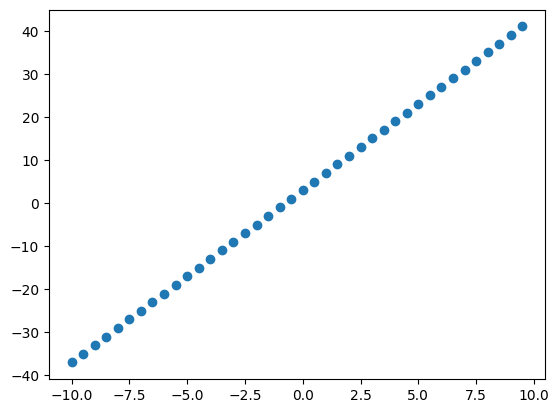

In [6]:
plt.scatter(x,y)

In [8]:
def mse(y,y_pred):
    return np.sum(np.square(y-y_pred)) / y.shape[0]

mse 0.0


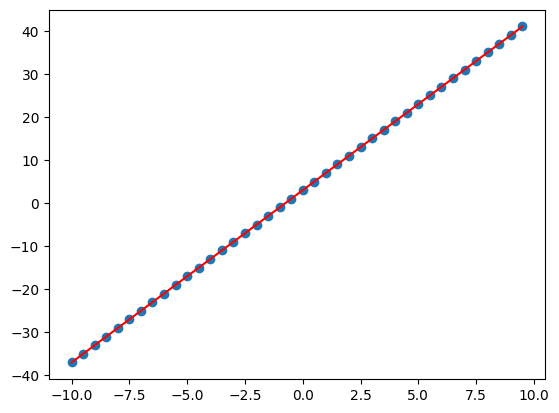

In [10]:
theta_0=3  #[0,5]
theta_1=4 # [0,5]
y_pred=theta_0+theta_1*x
print(f"mse {mse(y,y_pred)}")
plt.scatter(x,y)
plt.plot(x,y_pred,c='red')
plt.show()

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]


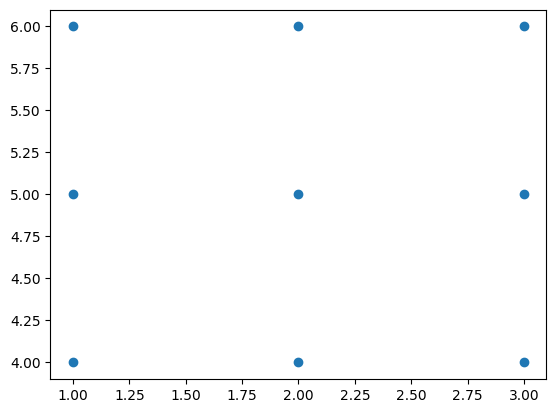

In [15]:
a=np.array([1,2,3])
b=np.array([4,5,6])

x1,x2=np.meshgrid(a,b)
print(x1)
print(x2)
plt.scatter(x1,x2)

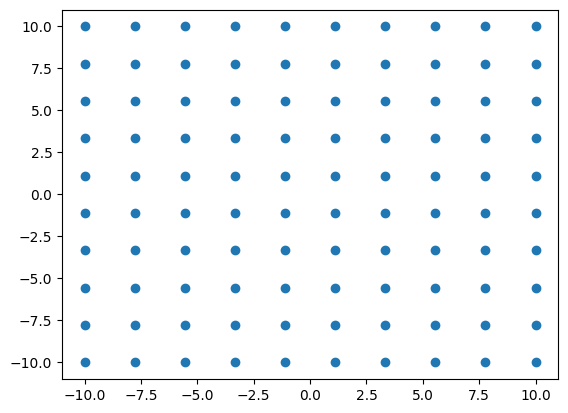

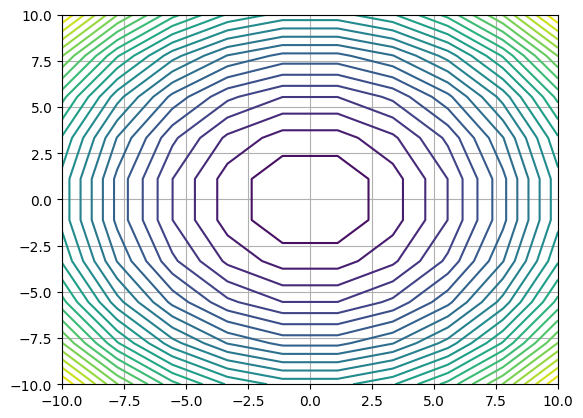

In [28]:

x1 = np.linspace(-10.0, 10.0, 10)
x2 = np.linspace(-10.0, 10.0, 10)

X1, X2 = np.meshgrid(x1, x2)

Z=X1**2+X2**2
plt.scatter(X1,X2)
plt.show()
cp = plt.contour(X1, X2, Z,levels=30)
plt.grid()
plt.show()


In [ ]:
def mse_loss(w0, w1, X, y):
    y_pred = w0 + w1 * X
    return np.mean((y - y_pred) ** 2)

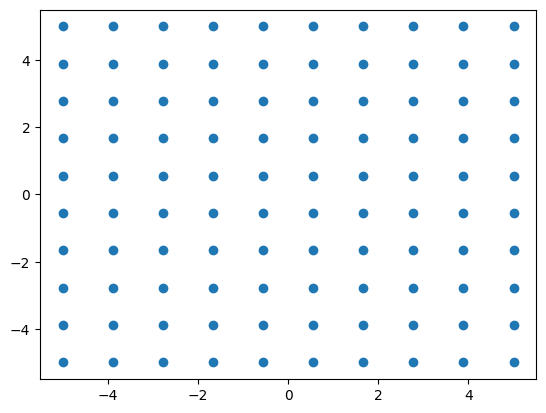

In [13]:
x = np.arange(-10, 10., 0.5)
y = f(x)
theta_0=np.linspace(-5,5,10)
theta_1=np.linspace(-5,5,10)

x1,x2=np.meshgrid(theta_0,theta_1)
plt.scatter(x1,x2)

In [11]:
x = np.arange(-10, 10., 0.5)
y = f(x)


theta_0=np.linspace(-10,10,10)
theta_1=np.linspace(0,5,10)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])

9.0


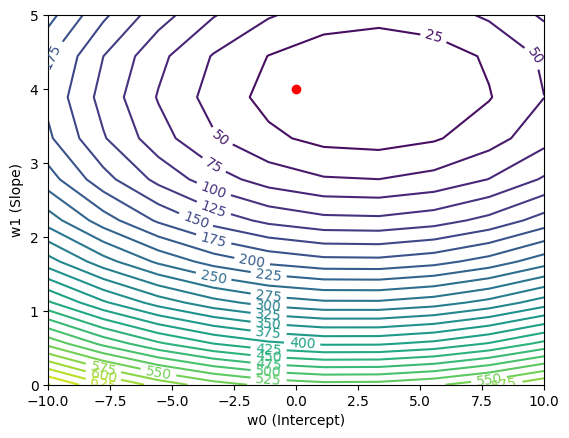

In [32]:

cp = plt.contour(t0, t1, Z,levels=30)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')

t_0,t_1=0,4
plt.scatter(t_0,t_1,c='red')
print(mse_loss(t_0, t_1, x, y))
plt.show()

9.0


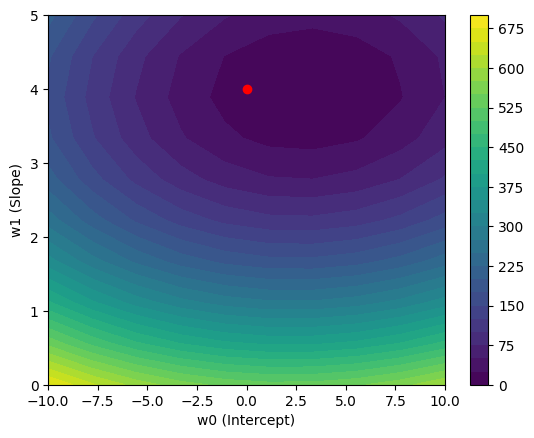

In [33]:

cp = plt.contourf(t0, t1, Z,levels=30)

plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')

t_0,t_1=0,4
plt.scatter(t_0,t_1,c='red')
print(mse_loss(t_0, t_1, x, y))
plt.show()

9.0


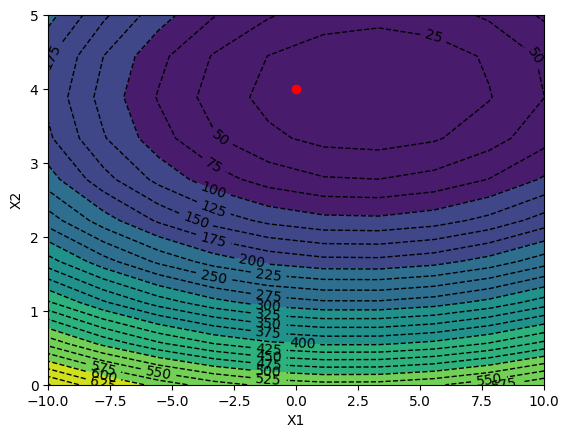

In [39]:
cp = plt.contour(t0, t1, Z, colors='black', linestyles='dashed', linewidths=1,levels=30)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(t0, t1, Z )
plt.xlabel('X1')
plt.ylabel('X2')
t_0,t_1=0,4
plt.scatter(t_0,t_1,c='red')
print(mse_loss(t_0, t_1, x, y))
plt.show()

In [107]:
def gradient_descent(x,y,alpha=0.1,iter=100):    
    cost=[]
    theta_0=-10
    theta_1=-10
    trajectory = [(theta_0, theta_1)]
    n=len(x)
    for _ in range(iter):
        y_pred=theta_0+theta_1*x
        cost.append((1/n) * np.sum((y_pred - y)**2))
        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)
        
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        trajectory.append((theta_0, theta_1))
        
    return theta_0,theta_1,trajectory,cost

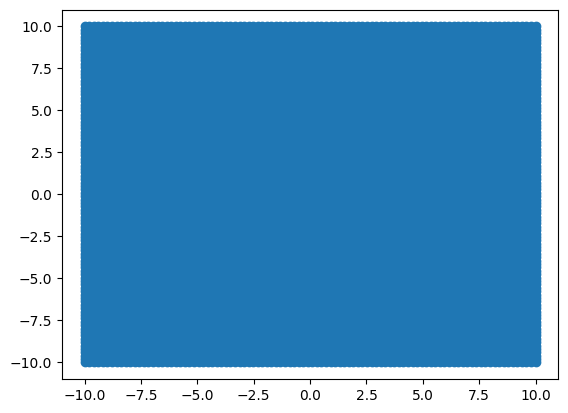

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
3.2763122575856896 3.5922501997740572


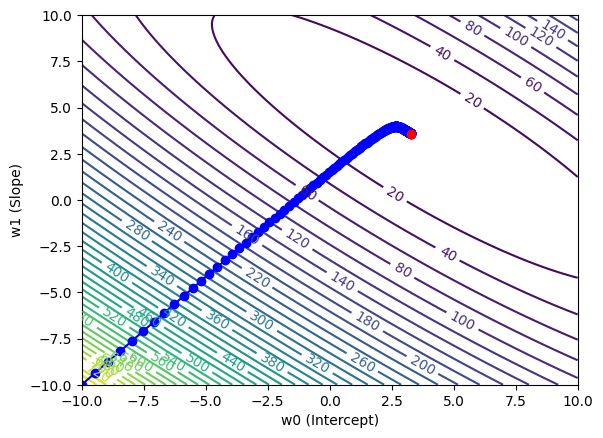

CPU times: total: 281 ms
Wall time: 702 ms


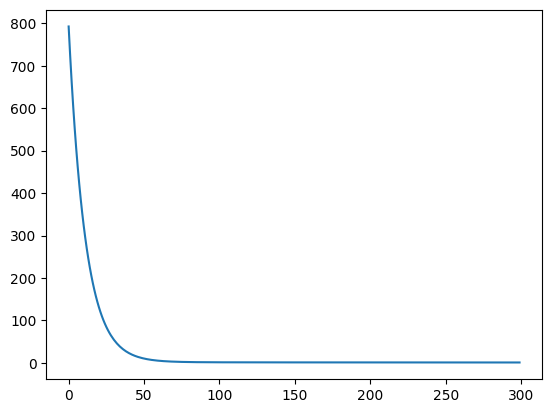

In [108]:
%%time
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])
plt.scatter(t0,t1)
plt.show()
theta_0,theta_1,trajectory,cost=gradient_descent(x,y,alpha=0.01,iter=300)
print(theta_0,theta_1)
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

plt.plot(cost)

### SGD 

In [103]:
def SGD(x,y,alpha=0.1,iter=100):
    
    cost=[]
    theta_0=-10
    theta_1=-10
    trajectory = [(theta_0, theta_1)]
    
 
    for _ in range(iter):
        i=np.random.randint(0, len(y))
        x_i=x[i]
        y_i=y[i]
        y_pred_i=theta_0+theta_1*x_i
        cost.append( np.sum((y_pred_i - y)**2))
        
        d_theta_0 = (-2) * (y_i - y_pred_i)
        d_theta_1 = (-2) * ((y_i - y_pred_i) * x_i)
        
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        trajectory.append((theta_0, theta_1))
        
    return theta_0,theta_1,trajectory,cost

3.3433888426672453 3.336342274737356


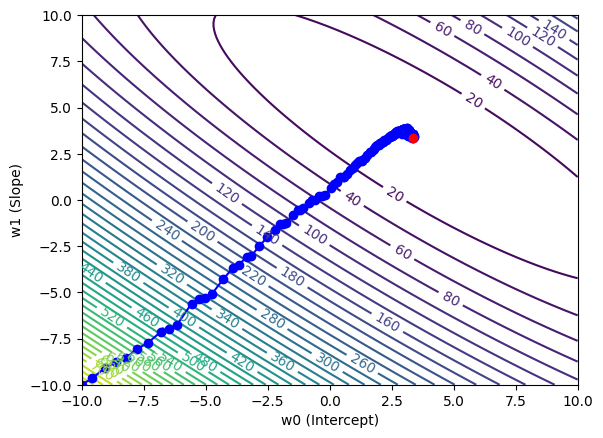

CPU times: total: 328 ms
Wall time: 1.05 s


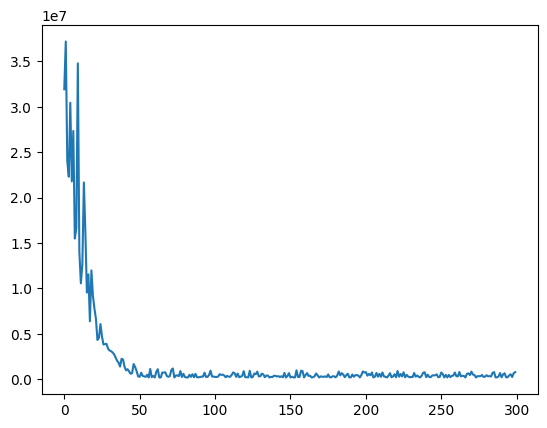

In [104]:
%%time
n_points = 50000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])

theta_0,theta_1,trajectory,cost=SGD(x,y,alpha=0.01,iter=300)
print(theta_0,theta_1)
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
plt.plot(cost)

### SGD Mini Batch

In [105]:
def SGD_Mini(x,y,alpha=0.1,iter=100,batch_size=3):
    cost=[]    
    theta_0=-10
    theta_1=-10
    trajectory = [(theta_0, theta_1)]
    
    for _ in range(iter):
        batch_indices = np.random.choice(len(y), size=batch_size, replace=False)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]
       
        y_pred=theta_0+theta_1*x_batch      
        
        cost.append((1/batch_size) * np.sum((y_pred - y_batch)**2))
        d_theta_0 = (-2/batch_size) * sum(y_batch - y_pred)
        d_theta_1 = (-2/batch_size) * sum((y_batch - y_pred) * x_batch)
        
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        trajectory.append((theta_0, theta_1))
        
    return theta_0,theta_1,trajectory,cost

In [315]:
np.random.choice(10,size=2,replace=True)

array([4, 7])

In [321]:
a=np.array([1,2,3,4,5,6,7,8,9])
c=np.random.choice(10,size=2,replace=False)
c
a[c]

array([5, 7])

3.3431399659059102 3.5382167723236893


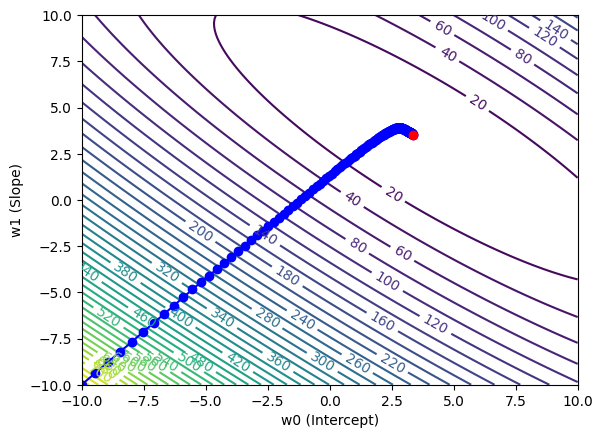

CPU times: total: 234 ms
Wall time: 423 ms


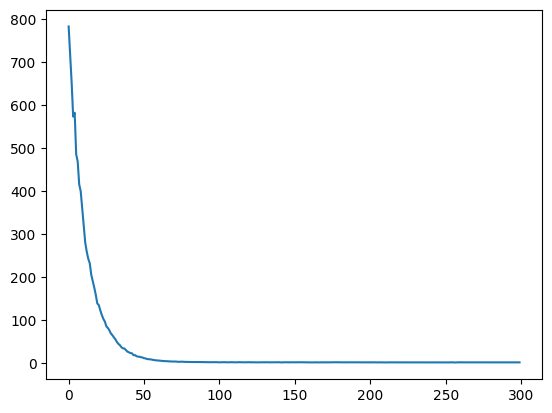

In [106]:

%%time
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])

theta_0,theta_1,trajectory,cost=SGD_Mini(x,y,alpha=0.01,iter=300,batch_size=300)
print(theta_0,theta_1)
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
plt.plot(cost)

In [118]:
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)




In [112]:
%%time
_,_,_,cost_GD=gradient_descent(x,y,alpha=0.1,iter=300)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
CPU times: total: 141 ms
Wall time: 201 ms


In [113]:
%%time
_,_,_,cost_SGD=SGD(x,y,alpha=0.1,iter=300)

CPU times: total: 0 ns
Wall time: 3.48 ms


In [117]:
%%time
_,_,_,cost_SGD_Mini=SGD_Mini(x,y,alpha=0.1,iter=300,batch_size=5)

CPU times: total: 31.2 ms
Wall time: 49.7 ms


### GD

In [242]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b,a,a,a,a))

array([[1, 2, 1, 1, 1, 1],
       [2, 3, 2, 2, 2, 2],
       [3, 4, 3, 3, 3, 3]])

In [173]:
def GD_multi(x,y,alpha=0.1,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient      
        
    return theta

In [186]:
def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))

In [202]:
n_sample=500000
X = 2 * np.random.rand(n_sample, 3) 
y = 4 + X.dot(np.array([3, 1.5, 2])) + np.random.randn(n_sample)
X_bias=add_bias_feature(X)



In [203]:
%%time
theta=GD_multi(X,y,iter=1000)
print(theta)

[4.1973404  2.70290521 3.19903496]
CPU times: total: 469 ms
Wall time: 4.19 s


In [200]:
def SGD_multi(x,y,alpha=0.1,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        i=np.random.randint(0, n_samples)
        x_i=x[i]
        y_i=y[i]
        y_pred=x_i.dot(theta)
        gradient = (2 ) * x_i.T.dot(y_pred - y_i)        
        theta = theta - alpha * gradient      
        
    return theta

In [201]:
%%time
theta=SGD_multi(X,y,iter=1000)
print(theta)

[3.81431477 1.62019716 2.68252358]
CPU times: total: 0 ns
Wall time: 13.8 ms


### SGD
## Сходимость

In [231]:
def SGD_multi(x,y,alpha=0.1,iter=100,tol=1e-3):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        i=np.random.randint(0, n_samples)
        x_i=x[i]
        y_i=y[i]
        y_pred=x_i.dot(theta)
        gradient = (2 ) * x_i.T.dot(y_pred - y_i)        
        theta = theta - alpha * gradient
        if np.linalg.norm(gradient) < tol:
                print(f"Convergence reached in {_}")
                break
        
    return theta

In [205]:
tol=1e-3
tol=0.001


0.001

In [235]:
%%time
theta=SGD_multi(X,y,iter=1000,tol=0.01)
print(theta)

Convergence reached in 430
[4.03062804 2.5893515  3.37015101]
CPU times: total: 0 ns
Wall time: 6.42 ms


In [224]:
def SGD_multi(x,y,alpha=0.1,iter=100,tol=1e-3):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        i=np.random.randint(0, n_samples)
        x_i=x[i]
        y_i=y[i]
        y_pred=x_i.dot(theta)
        theta_old=theta.copy()
        gradient = (2 ) * x_i.T.dot(y_pred - y_i)        
        theta = theta - alpha * gradient
        if np.linalg.norm(theta-theta_old) < tol:
                print(f"Convergence reached in {_}")
                break
        
    return theta

In [236]:
%%time
theta=SGD_multi(X,y,iter=1000,tol=0.1)
print(theta)

Convergence reached in 45
[4.44835324 3.08088288 2.63427085]
CPU times: total: 0 ns
Wall time: 1 ms


### Длина шага

In [331]:
def gradient_descent(x,y,iter=100,tol=0.001):    
    cost=[]
    theta_0=0
    theta_1=0
    trajectory = [(theta_0, theta_1)]
    n=len(x)
    for t in range(1,iter+1):
        alpha=1/t
        y_pred=theta_0+theta_1*x
        cost.append((1/n) * np.sum((y_pred - y)**2))
        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)
        
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        trajectory.append((theta_0, theta_1))
        
        
    return theta_0,theta_1,trajectory,cost

In [339]:
def GD_multi(x,y,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
    
    for t in range(1,iter+1):
        alpha=1/t
        
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient
        
        
    return theta

In [342]:
%%time
n_points = 5000

X = 2 * np.random.rand(n_sample, 3) 
y = 4 + X.dot(np.array([3, 1.5, 2])) + np.random.randn(n_sample)

theta=GD_multi(X,y,iter=300)
print(theta)

[4.25710396 2.74902061 3.21067712]
CPU times: total: 0 ns
Wall time: 6.96 ms


In [293]:
def gradient_descent(x,y,iter=100,beta=0.3):    
    cost=[]
    theta_0=-10
    theta_1=-10
    trajectory = [(theta_0, theta_1)]
    n=len(x)
    for t in range(1,iter+1):
        alpha=0.1/t**beta
        y_pred=theta_0+theta_1*x
        cost.append((1/n) * np.sum((y_pred - y)**2))
        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)
        
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        trajectory.append((theta_0, theta_1))
        
        
    return theta_0,theta_1,trajectory,cost

3.7937968691426307 3.185378719778873


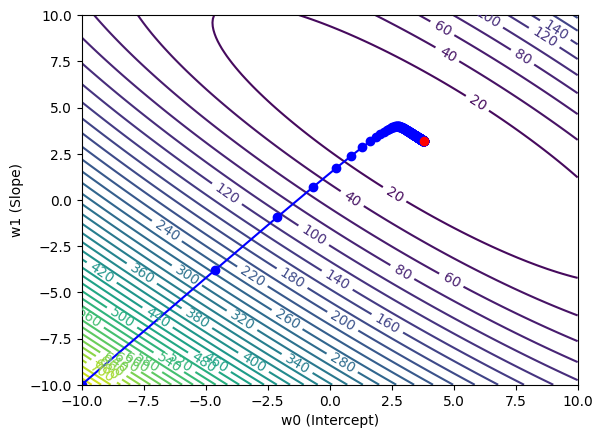

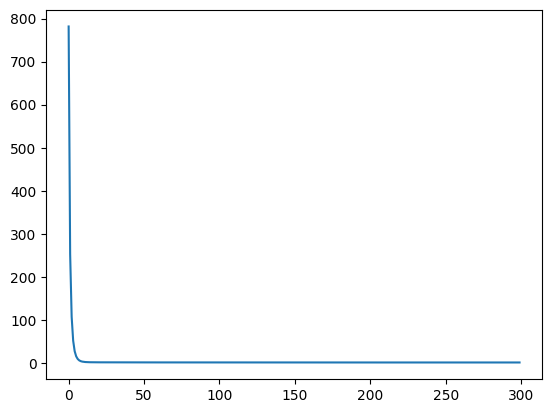

In [294]:
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])

theta_0,theta_1,trajectory,cost=gradient_descent(x,y,iter=300,beta=0.3)
print(theta_0,theta_1)
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

plt.plot(cost)

### Scaling

In [295]:
def z_score_scaling(data):    
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)    
    scaled_data = (data - mean) / std_dev
    return scaled_data


In [298]:
a=np.array([1,2,3,4,5])
np.mean(a)

3.0

In [306]:
data = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
d=z_score_scaling(data)
np.std(d)

1.0